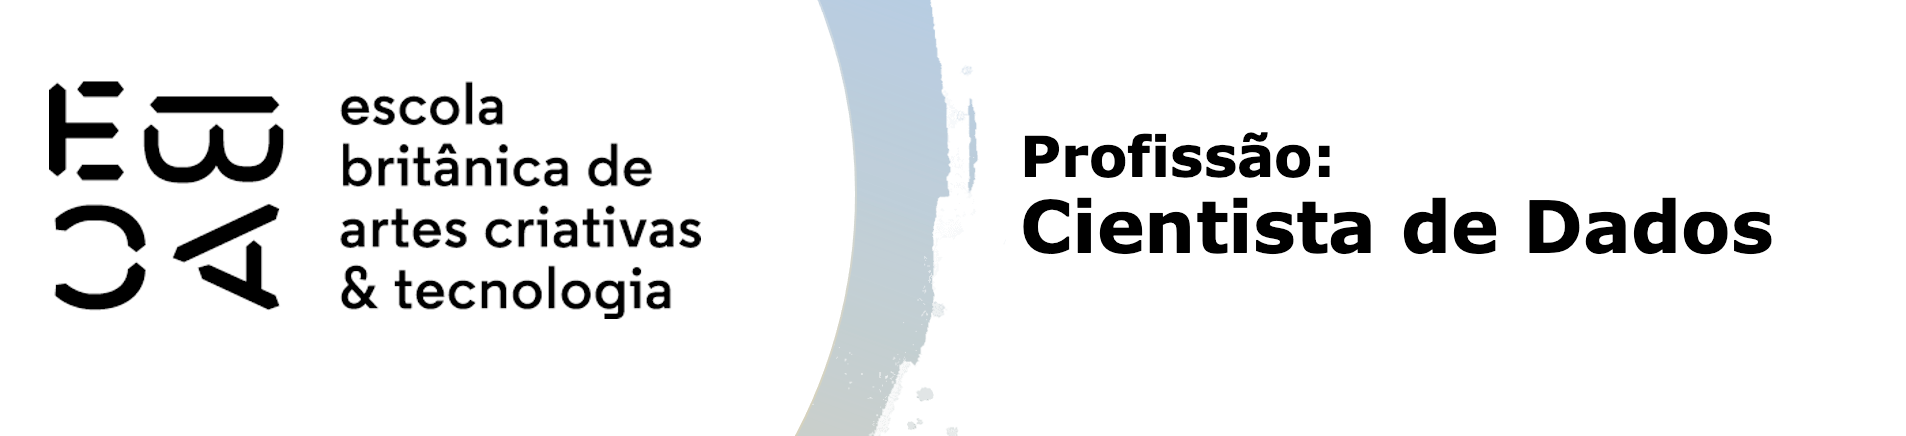

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 30** | Hierárquicos / aglomerativos | Exercício I

**Aluno:** [Marcio da Silva](https://www.linkedin.com/in/marcio-d-silva/)<br>
**Data:** 14 de outubro de 2024.

---


# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [64]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

from gower                   import gower_matrix
from scipy.cluster           import hierarchy
from scipy.spatial.distance  import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [4]:
df = pd.read_csv('online_shoppers_intention.csv')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,count
Revenue,
False,10422
True,1908


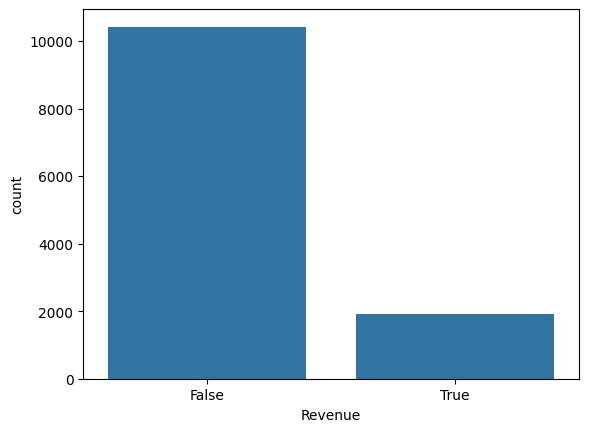

In [11]:
#Exibindo contagem de valores.
display(df.Revenue.value_counts(dropna=False).to_frame())

#Criando um gráfico para a coluna Revenue.
sns.countplot(x='Revenue', data=df);

plt.show()

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [30]:
#Print de informaçoes acerca da estutura do DF.
print(f'''
      Quantidade de linhas: {df.shape[0]}
      Quantidade de colunas: {df.shape[1]}
      Quantidade de valores missing: {df.isna().sum().sum()}
      ''')

#Exibindo informações com maiores detalhes referentes ao DF.
df.info()

#Exibição estatistica para colunas númericas.
display(df.describe())


      Quantidade de linhas: 12330
      Quantidade de colunas: 18
      Quantidade de valores missing: 0
      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser          

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


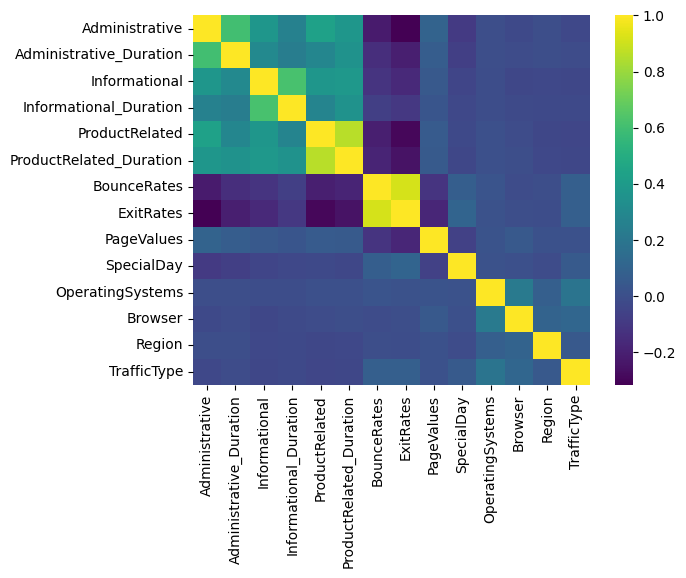

In [28]:
#Plotando um mapa de calor com intuito de vizualizar correlações entre as colunas.
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap='viridis');

plt.show()

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [38]:
#listando as variaveis com padrão de navegação,
session_navigation = ['Administrative',
                      'Browser',
                      'Informational',
                      'OperatingSystems',
                      'PageValues',
                      'ProductRelated',
                      'TrafficType',
                      'VisitorType']
#Criando um DF e renomeando as colunas.
(df[session_navigation]
 .dtypes
 .reset_index()
 .rename(columns={'index': 'Variável (session_navigation)',
                  0: 'Tipo'})
)

,Variável (session_navigation),Tipo
0,Administrative,int64
1,Browser,int64
2,Informational,int64
3,OperatingSystems,int64
4,PageValues,float64
5,ProductRelated,int64
6,TrafficType,int64
7,VisitorType,object


In [39]:
#Lista que indica caracteristicas da data.
temporal_indicators = ['SpecialDay', 'Month', 'Weekend']

#Plotando um DF e renomeando as clunas.
(df[temporal_indicators]
 .dtypes
 .reset_index()
 .rename(columns={'index': 'Variável (temporal_indicators)',
                  0: 'Tipo'})
)

,Variável (temporal_indicators),Tipo
0,SpecialDay,float64
1,Month,object
2,Weekend,bool


In [40]:
#Listagem das variáveis númericas.
numeric = ['ProductRelated', 'PageValues', 'SpecialDay']

#Selecionando vaviáveis ao padrão de navegação e a caracteristica da data.
dfr = df[session_navigation + temporal_indicators]

#Seleção de varivaies categorivas e remoção das númericas.
df_cat = dfr.drop(columns=numeric)

#Print dos valores para cada variáveis.
print('Variáveis categóricas e seus valores únicos: ')
[f'{cat}: {df[cat].unique()}'for cat in df_cat]


Variáveis categóricas e seus valores únicos: 


['Administrative: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20\n 23 27 26]',
 'Browser: [ 1  2  3  4  5  6  7 10  8  9 12 13 11]',
 'Informational: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]',
 'OperatingSystems: [1 2 4 3 7 6 8 5]',
 'TrafficType: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]',
 "VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']",
 "Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']",
 'Weekend: [False  True]']

In [49]:
#Criando variáveis dummys para padrão de navegação e características da data.
df_dummies = pd.get_dummies(data=dfr, drop_first=False)

#Obtendo colunas de variáveis categóricas.
categorical_features = df_dummies.drop(columns=numeric).columns.values

#Lista de valores booleanos que indica se cada coluna é categórica.
cat_features = [True if column in categorical_features else False for column in df_dummies]

#Criando coluna indicando se a variável é categórica.
(df_dummies
 .dtypes
 .reset_index()
 .rename(columns={'index': 'Variável',
                 0: 'Tipo'})
 .assign(Categorical=cat_features)                 
 )

,Variável,Tipo,Categorical
0,Administrative,int64,True
1,Browser,int64,True
2,Informational,int64,True
3,OperatingSystems,int64,True
4,PageValues,float64,False
5,ProductRelated,int64,False
6,TrafficType,int64,True
7,SpecialDay,float64,False
8,Weekend,bool,True
9,VisitorType_New_Visitor,bool,True


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [50]:
%%time

#Calculo da matriz de distância Gower.
distance_gower = gower_matrix(data_x=df_dummies, cat_features=cat_features)

#Criando um DF da matriz de distância.
pd.DataFrame(distance_gower)

CPU times: user 3min 5s, sys: 4.43 s, total: 3min 9s
Wall time: 3min 11s


,0,1,2,3,4,5,6,7,8,9,...,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329
0,0.000000,0.136428,0.090909,0.136428,0.182398,0.137524,0.154545,0.181883,0.172792,0.154674,...,0.182269,0.136686,0.274081,0.275500,0.228240,0.277618,0.272985,0.273050,0.273630,0.363765
1,0.136428,0.000000,0.136428,0.090909,0.182334,0.046551,0.109155,0.181947,0.081818,0.063701,...,0.136750,0.227531,0.137653,0.184526,0.182721,0.323008,0.227466,0.227531,0.182656,0.272792
2,0.090909,0.136428,0.000000,0.136428,0.182398,0.092070,0.109091,0.227337,0.127337,0.154674,...,0.227724,0.227595,0.274081,0.275500,0.273694,0.277618,0.272985,0.273050,0.273630,0.363765
3,0.136428,0.090909,0.136428,0.000000,0.091425,0.092005,0.154610,0.181947,0.127273,0.154610,...,0.182205,0.227531,0.228562,0.229981,0.228175,0.323008,0.182012,0.182076,0.228111,0.272792
4,0.182398,0.182334,0.182398,0.091425,0.000000,0.182398,0.200580,0.182463,0.218698,0.200451,...,0.272856,0.272985,0.318956,0.320374,0.318569,0.277038,0.182141,0.182076,0.318504,0.273179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.277618,0.323008,0.277618,0.323008,0.277038,0.321912,0.341254,0.277683,0.359372,0.341125,...,0.277167,0.277296,0.230810,0.320300,0.322105,0.000000,0.277360,0.277296,0.322170,0.368398
12326,0.272985,0.227466,0.272985,0.182012,0.182141,0.228175,0.291167,0.227595,0.263830,0.291038,...,0.136557,0.181883,0.273823,0.184333,0.182527,0.277360,0.000000,0.045519,0.182463,0.136493
12327,0.273050,0.227531,0.273050,0.182076,0.182076,0.228111,0.291231,0.227660,0.263894,0.291103,...,0.136493,0.181818,0.273759,0.184268,0.182463,0.277296,0.045519,0.000000,0.182398,0.136557
12328,0.273630,0.182656,0.273630,0.228111,0.318504,0.182076,0.246357,0.273694,0.219020,0.246228,...,0.091360,0.182398,0.182269,0.092779,0.136428,0.322170,0.182463,0.182398,0.000000,0.273501


In [53]:
%%time

#Convertendo matriz de distância em vetor.
gdv = squareform(X=distance_gower, force='tovector')

#Calculo usando o complete.
Z = linkage(y=gdv, method='complete')

#DF com matriz de ligação.
pd.DataFrame(data=Z, columns=['id1', 'id2', 'dist', 'n'])

CPU times: user 5.67 s, sys: 1.83 s, total: 7.5 s
Wall time: 8.46 s


,id1,id2,dist,n
0,166.0,167.0,0.000000,2.0
1,64.0,140.0,0.000000,2.0
2,143.0,12331.0,0.000000,3.0
3,10.0,87.0,0.000000,2.0
4,60.0,163.0,0.000000,2.0
...,...,...,...,...
12324,24650.0,24653.0,0.454280,6666.0
12325,24632.0,24636.0,0.481065,1415.0
12326,24637.0,24654.0,0.506725,9222.0
12327,24652.0,24655.0,0.547158,3108.0


CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 12.9 μs

3 grupos:
Dendrogram.icoord: 117
Dendrogram.dcoord: 117
Dendrogram.ivl: 118
Dendrogram.leaves: 118
Dendrogram.color_list: 117
Dendrogram.leaves_color_list: 118

4 grupos:
Dendrogram.icoord: 117
Dendrogram.dcoord: 117
Dendrogram.ivl: 118
Dendrogram.leaves: 118
Dendrogram.color_list: 117
Dendrogram.leaves_color_list: 118


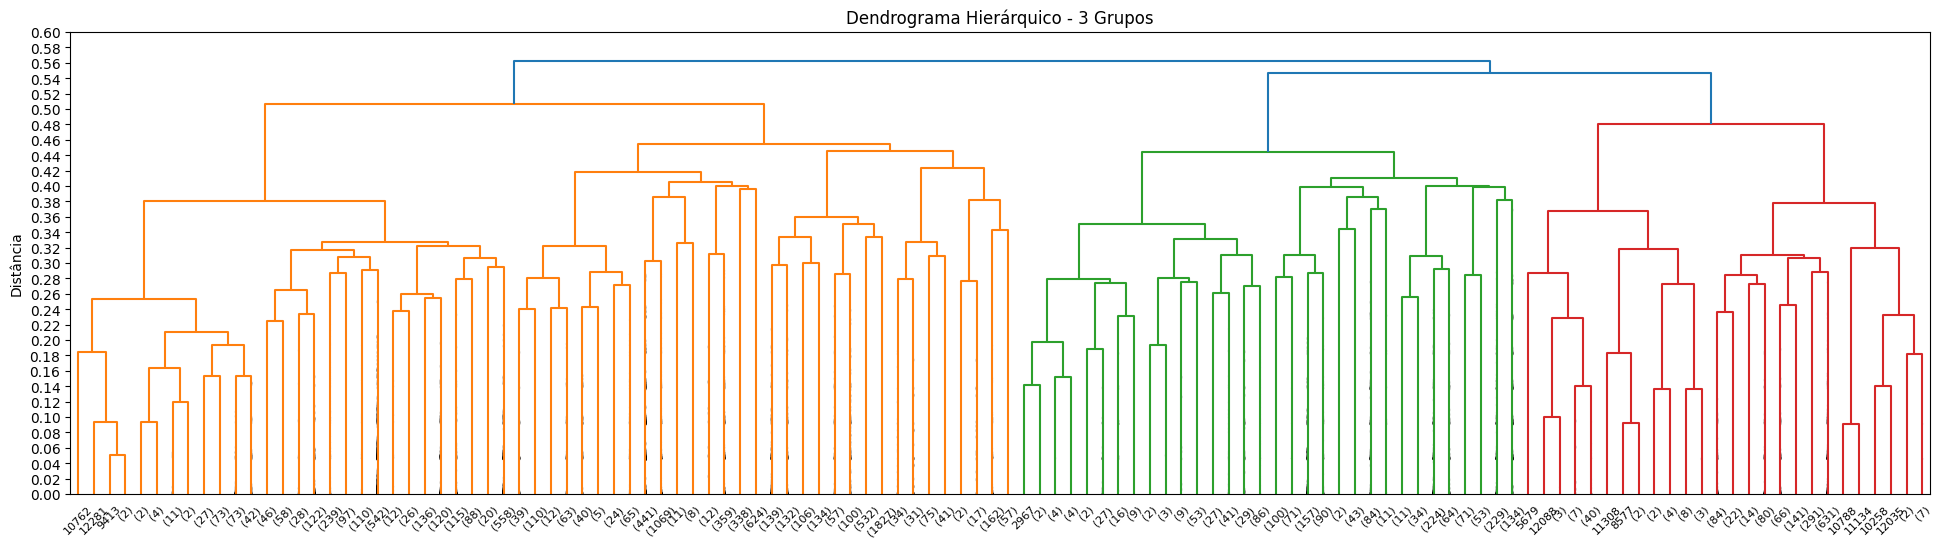

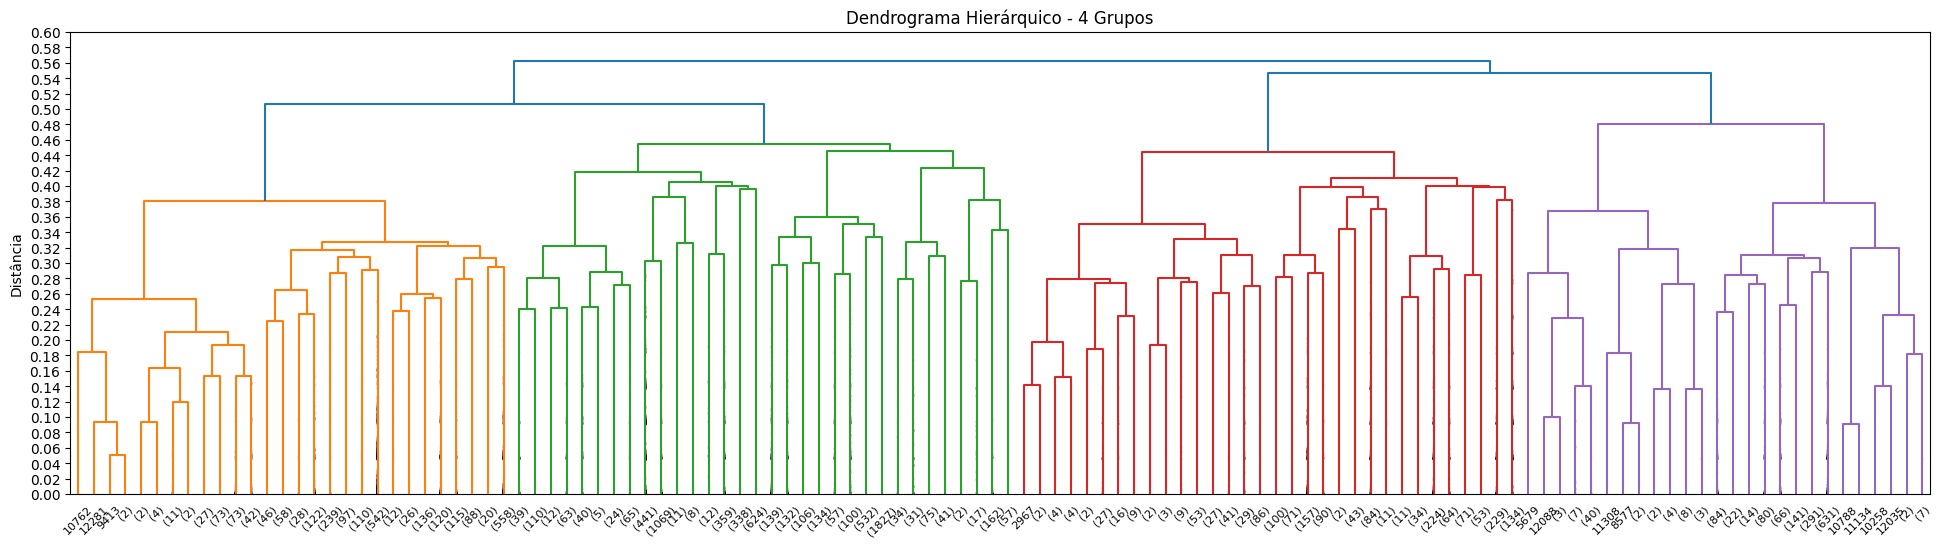

In [74]:
%time
def den(color_threshold: float, num_groups: int, Z) -> None:
    """
    Esta função cria e exibe um dendrograma.
    
    Parâmetros:
        color_threshold (float): Valor de threshold de cor para correlacionar no dendrograma.
        num_groups (int): Número de grupos no título do dendrograma.
        Z: Matriz de ligação (linkage matrix) para o dendrograma.
    """
    plt.figure(figsize=(24, 6))
    plt.ylabel('Distância')
    plt.title(f'Dendrograma Hierárquico - {num_groups} Grupos')

    # Criação do dendrograma na matriz de ligação Z.
    den = hierarchy.dendrogram(
        Z=Z,
        p=6,
        truncate_mode='level',
        color_threshold=color_threshold,
        show_leaf_counts=True,
        leaf_font_size=8,
        leaf_rotation=45,
        show_contracted=True
    )
    plt.yticks(np.linspace(0, .6, num=31))

    # Plot de elementos em cada parte do dendrograma.
    for key in den.keys():
        print(f'Dendrogram.{key}: {len(den[key])}')

# Definindo os thresholds para 3 e 4 grupos
for qtd, color_threshold in [(3, .53), (4, .5)]:
    print(f'\n{qtd} grupos:')
    den(color_threshold, qtd, Z)  # Passando Z como argumento

plt.show()

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [75]:
# Adicionar a coluna 'grupo_3' ao DF com base no agrupamento hierárquico.
df['grupo_3'] = fcluster(Z, t=3, criterion='maxclust')

# Criar um DataFrame contendo a contagem de elementos em cada grupo
contagem_grupos = (
    pd.DataFrame({
        'Grupo': df['grupo_3'].value_counts().index, 
        'Quantidade': df['grupo_3'].value_counts().values
    })
    .set_index('Grupo')
)

# Exibir a contagem de grupos
display(contagem_grupos)

,Quantidade
Grupo,
1,9222
2,1693
3,1415


In [80]:
# Criar e exibir uma tabela cruzada normalizada por linha para as variáveis 'VisitorType', 'grupo_3' e 'Revenue'.
tabela_crosstab = (
    pd.crosstab(index=df['VisitorType'], 
                 columns=[df['grupo_3'], df['Revenue']], 
                 normalize='index')
    .applymap(lambda x: f'{x * 100:.0f} %')  # Formatar como porcentagem.
)

# Exibir a tabela cruzada
display(tabela_crosstab)

/var/folders/35/wxry5fy93jq958pscyfmnt5m0000gn/T/ipykernel_11138/3645211059.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f'{x * 100:.0f} %')  # Formatar como porcentagem


grupo_3               1           2           3      
Revenue           False True  False True  False True 
VisitorType                                          
New_Visitor         0 %   0 %  75 %  25 %   0 %   0 %
Other               0 %   1 %   0 %   0 %  81 %  18 %
Returning_Visitor  75 %  13 %   0 %   0 %  11 %   1 %

In [85]:
# Criar e exibir uma tabela cruzada normalizada por linha para as variáveis 'Revenue' e 'grupo_3'.
tabela_crosstab = (
    pd.crosstab(index=df['Revenue'], 
                 columns=df['grupo_3'], 
                 normalize='index')
    .applymap(lambda x: f'{x * 100:.2f} %')  # Formatar como porcentagem com duas casas decimais.
    .rename(columns={
        1: '1 (Returning Visitor)', 
        2: '2 (New Visitor)', 
        3: '3 (Other)'
    })
)

# Exibir a tabela cruzada
display(tabela_crosstab)

/var/folders/35/wxry5fy93jq958pscyfmnt5m0000gn/T/ipykernel_11138/200353307.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f'{x * 100:.2f} %')  # Formatar como porcentagem com duas casas decimais.


grupo_3,1 (Returning Visitor),2 (New Visitor),3 (Other)
Revenue,,,
False,75.60 %,12.20 %,12.20 %
True,70.39 %,22.12 %,7.49 %


In [83]:
# Adicionar uma coluna 'grupo_4' ao DataFrame com base no agrupamento hierárquico
df['grupo_4'] = fcluster(Z, t=4, criterion='maxclust')

# Criar um DataFrame contendo a contagem de elementos em cada grupo
contagem_grupos_4 = (
    pd.DataFrame({
        'Grupo': df['grupo_4'].value_counts().index, 
        'Quantidade': df['grupo_4'].value_counts().values
    })
    .set_index('Grupo')
    .sort_index()  # Ordenar os grupos
)

# Exibir a contagem de grupos
display(contagem_grupos_4)

,Quantidade
Grupo,
1,2556
2,6666
3,1693
4,1415


In [86]:
# Criar e exibir uma tabela cruzada normalizada por coluna para as variáveis 'Month', 'grupo_4' e 'Revenue'
tabela_crosstab = (
    pd.crosstab(index=df['Month'], 
                 columns=[df['grupo_4'], df['Revenue']], 
                 normalize='columns')
    .applymap(lambda x: f'{x * 100:.2f} %')  # Formatar como porcentagem com duas casas decimais
)

# Exibir a tabela cruzada
display(tabela_crosstab)

/var/folders/35/wxry5fy93jq958pscyfmnt5m0000gn/T/ipykernel_11138/240443097.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f'{x * 100:.2f} %')  # Formatar como porcentagem com duas casas decimais


grupo_4         1                  2                 3                 4  \
Revenue     False     True     False    True     False    True     False   
Month                                                                      
Aug        0.00 %    0.00 %   5.14 %   7.70 %   4.01 %   4.98 %   0.00 %   
Dec        0.00 %    0.00 %   0.00 %   0.00 %  20.38 %  17.77 %  98.43 %   
Feb        0.00 %    0.00 %   3.02 %   0.42 %   0.08 %   0.00 %   0.00 %   
Jul        0.00 %    0.00 %   5.43 %   7.70 %   3.38 %   2.61 %   0.00 %   
June       0.00 %    0.00 %   3.95 %   3.08 %   1.81 %   1.66 %   0.08 %   
Mar        0.00 %    0.00 %  25.52 %  21.85 %  15.42 %   8.53 %   0.00 %   
May        0.00 %    0.00 %  46.51 %  38.80 %  18.17 %  20.85 %   0.00 %   
Nov      100.00 %  100.00 %   0.02 %   0.14 %  22.90 %  30.33 %   1.49 %   
Oct        0.00 %    0.00 %   5.68 %  12.18 %   7.55 %   6.64 %   0.00 %   
Sep        0.00 %    0.00 %   4.74 %   8.12 %   6.29 %   6.64 %   0.00 %   

grupo_4           
Revenue    True   
Month             
Aug       0.00 %  
Dec      98.60 %  
Feb       0.00 %  
Jul       0.00 %  
June      0.00 %  
Mar       0.00 %  
May       0.00 %  
Nov       1.40 %  
Oct       0.00 %  
Sep       0.00 %

In [87]:
# Criar e exibir uma tabela cruzada normalizada por linha para as variáveis 
# 'Revenue', 'VisitorType', 'SpecialDay' e 'grupo_4', com renomeação dos grupos
tabela_crosstab = (
    pd.crosstab(index=[df['Revenue'], df['VisitorType'], df['SpecialDay']], 
                 columns=df['grupo_4'], 
                 normalize='index')
    .applymap(lambda x: f'{x * 100:.2f} %')  # Formatar como porcentagem com duas casas decimais
    .rename(columns={
        1: '1 (Returning Visitor - SpecialDay 0)', 
        2: '2 (Returning Visitor - SpecialDay 1)', 
        3: '3 (New Visitor)', 
        4: '4 (Other)'
    })
)

# Exibir a tabela cruzada
display(tabela_crosstab)

/var/folders/35/wxry5fy93jq958pscyfmnt5m0000gn/T/ipykernel_11138/1446384242.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f'{x * 100:.2f} %')  # Formatar como porcentagem com duas casas decimais


grupo_4                              1 (Returning Visitor - SpecialDay 0)  \
Revenue VisitorType       SpecialDay                                        
False   New_Visitor       0.0                                      0.00 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
        Other             0.0                                      0.00 %   
        Returning_Visitor 0.0                                     24.24 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
True    New_Visitor       0.0                                      0.00 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
        Other             0.0                                      6.25 %   
        Returning_Visitor 0.0                                     44.57 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   

grupo_4                              2 (Returning Visitor - SpecialDay 1)  \
Revenue VisitorType       SpecialDay                                        
False   New_Visitor       0.0                                      0.00 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
        Other             0.0                                      0.00 %   
        Returning_Visitor 0.0                                     60.64 %   
                          0.2                                    100.00 %   
                          0.4                                    100.00 %   
                          0.6                                    100.00 %   
                          0.8                                    100.00 %   
                          1.0                                    100.00 %   
True    New_Visitor       0.0                                      0.00 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
        Other             0.0                                      0.00 %   
        Returning_Visitor 0.0                                     46.34 %   
                          0.2                                    100.00 

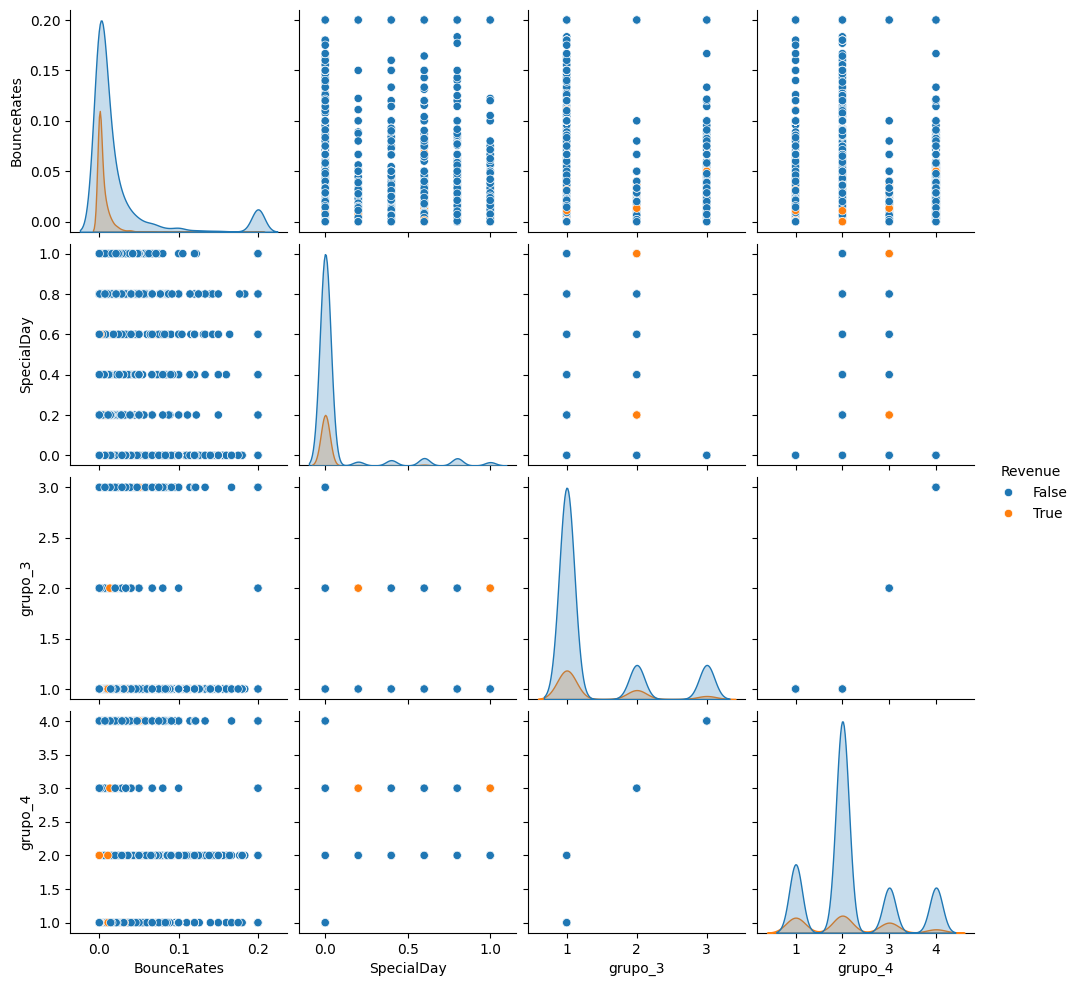

In [88]:
# Se 'Revenue' é uma variável binária, você pode convertê-la em um tipo categórico
df['Revenue'] = df['Revenue'].astype('category')

# Criar um pair plot para visualizar as relações entre as variáveis 
sns.pairplot(data=df[['BounceRates', 'Revenue', 'SpecialDay', 'grupo_3', 'grupo_4']], hue='Revenue')

# Exibir o pair plot
plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

**Resposta:** Após de executar as análises, a interpretação seria: O Grupo 1 possui o menor BounceRate médio e a maior receita média, indicando que os clientes deste grupo são os mais propensos à compra. Por outro lado, o Grupo 4 apresenta um BounceRate elevado e uma receita média baixa, sugerindo que esses clientes têm menor interesse em realizar compras.

